In [1]:
from PIL import Image
import torch
from transformers import CLIPTokenizer

from model_loader import preload_models_from_standard_weights
from pipeline import generate


DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backend.mps.is_available()) and ALLOW_MPS:
    DEVCIE = "mps"
    
print(f"Using device: {DEVICE}")

VOCAB_PATH = "../data/vocab.json"
MERGE_PATH = "../data/merges.txt"
MODEL_PATH = "../data/v1-5-pruned-emaonly.ckpt"

tokenizer = CLIPTokenizer(VOCAB_PATH, merges_file=MERGE_PATH)
models = preload_models_from_standard_weights(MODEL_PATH, DEVICE)

Using device: cpu


# Text-to-Image

In [2]:
PROMPT = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 8k resolution"
UNCOND_PROMPT = "" # Use as a negative prompt
DO_CFG = True
CFG_SCALE = 7 # Ranges from 1-14: The amount of attention to pay to the prompt. Higher means more.

# Image-to-Image

In [3]:
IMAGE_PATH = "../images/dog.jpg"
# INPUT_IMAGE = Image.open(IMAGE_PATH)
INPUT_IMAGE = None
STRENGTH = 0.9

In [4]:
SAMPLER = "ddpm"
N_INFERENCE_STEPS = 50
SEED = 42

100%|██████████| 50/50 [22:12<00:00, 26.65s/it]


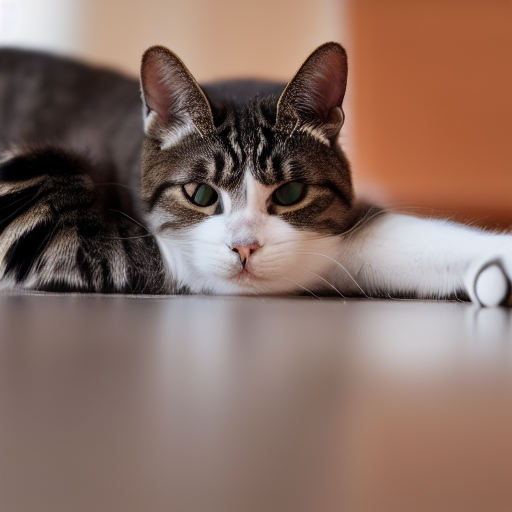

In [5]:
output_image = generate(
    prompt=PROMPT,
    uncond_prompt=UNCOND_PROMPT,
    input_image=INPUT_IMAGE,
    strength=STRENGTH,
    do_cfg=DO_CFG,
    cfg_scale=CFG_SCALE,
    sampler_name=SAMPLER,
    n_inference_steps=N_INFERENCE_STEPS,
    seed=SEED,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)